## DR = (Digit Recognizer) 

- https://www.kaggle.com/c/digit-recognizer


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
import time

In [2]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
train.shape

(42000, 785)

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
learning_rate = 0.0001
total_train = 2500
drop_out = 0.7
batch_size = 50
VALIDATION_SIZE = 2000
IMAGE_TO_DISPLAY = 10

## 784 = 28 x 28

In [7]:
images = train.iloc[:,1:].values
images = images.astype(np.float)
print(images)
images = np.multiply(images, 1.0 / 255.0)
print(len(images))
print('images({0[0]},{0[1]})'.format(images.shape))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
42000
images(42000,784)


- image에서 1번 성분 추출

In [8]:
image_size = images.shape[1]
print(image_size)

784


- ceil 반올림 개념

In [9]:
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)
print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_width => 28
image_height => 28


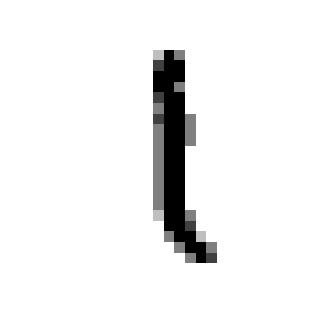

In [10]:
image_01 = images[400].reshape(image_width,image_height)
plt.axis('off')
plt.imshow(image_01, cmap = cm.binary)
plt.show()

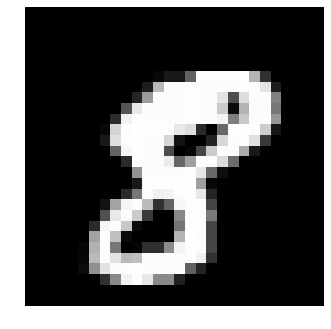

In [11]:
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary_r)
    plt.show()
# output image     
display(images[IMAGE_TO_DISPLAY])

In [12]:
labels_flat = train[[0]].values.ravel()
print(labels_flat)

[1 0 1 ..., 7 6 9]


In [13]:
print('labels_flat({0})'.format(len(labels_flat)))
print ('labels_flat[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels_flat[IMAGE_TO_DISPLAY]))

labels_flat(42000)
labels_flat[10] => 8


In [14]:
labels_count = np.unique(labels_flat).shape[0]
print('labels_count => {0}'.format(labels_count))

labels_count => 10


In [15]:
def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

labels = dense_to_one_hot(labels_flat, labels_count)
labels = labels.astype(np.uint8)

print('labels({0[0]},{0[1]})'.format(labels.shape))
print ('labels[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels[IMAGE_TO_DISPLAY]))

labels(42000,10)
labels[10] => [0 0 0 0 0 0 0 0 1 0]


## Data process for tensorflow

In [16]:
validation_images = images[:VALIDATION_SIZE]
validation_labels = labels[:VALIDATION_SIZE]

train_images = images[VALIDATION_SIZE:]
train_labels = labels[VALIDATION_SIZE:]

print('train_images({0[0]},{0[1]})'.format(train_images.shape))
print('validation_images({0[0]},{0[1]})'.format(validation_images.shape))

train_images(40000,784)
validation_images(2000,784)


# Model

In [17]:
#images
X = tf.placeholder(tf.float32, shape=[None, image_size])
#labels
Y = tf.placeholder(tf.float32, shape=[None, labels_count])
keep_prob = tf.placeholder(tf.float32)

- The convolution computes 32 features for each 5x5 patch. Its weight tensor has a shape of [5, 5, 1, 32].

- tf.reshpte[-1(None), 넓이, 높이, 밀도]

In [18]:
image = tf.reshape(X, [-1, image_width, image_height,1])
print(image.get_shape())

(?, 28, 28, 1)


## layer_01
``
(?, 28, 28, 4, 8)
(?, 4, 28, 8, 28)
(?, 112, 224)
``

In [19]:
with tf.name_scope("layer1") as scope:
    weight_01 = tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1),name = "Weight_one")
    bias_01 = tf.Variable(tf.constant(0.1,shape=[32]), name="Bias_one")
    con2d_01 = tf.nn.conv2d(image, weight_01, strides=[1,1,1,1], padding='SAME')
    con2d_01 = con2d_01 + bias_01
    con2d_01 = tf.nn.relu(con2d_01)
    con2d_01_mp = tf.nn.max_pool(con2d_01, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    layer_01 = tf.reshape(con2d_01, (-1, image_height, image_width, 4, 8))
    layer_01 = tf.transpose(layer_01, (0, 3, 1, 4,2))
    layer_01 = tf.reshape(layer_01, (-1, image_height * 4, image_width * 8))
    
    w1_histogram = tf.summary.histogram("Weight_one", weight_01)
    b1_histogram = tf.summary.histogram("Bias_one", bias_01)
    conv2d_01_histogram = tf.summary.histogram("Conv2d_one", con2d_01)
    conv2d_01_maxpool_histogram = tf.summary.histogram("one_Max_Pool", con2d_01_mp)
    layer_one_histogram = tf.summary.histogram("Layer1",layer_01)

# Layer 02
``
(?, 14, 14, 64)
(?, 14, 14, 64)
(?, 14, 14, 64)
(?, 7, 7, 64)
``

In [20]:
with tf.name_scope("layer2") as scope:
    weight_02 = tf.Variable(tf.truncated_normal([5,5,32,64],stddev=0.1), name = "Weight_two")
    bias_02 = tf.Variable(tf.constant(0.1,shape=[64]),name = "Bias_two")
    con2d_02 = tf.nn.conv2d(con2d_01_mp, weight_02, strides=[1,1,1,1], padding='SAME')
    con2d_02 = con2d_02 + bias_02
    con2d_02 = tf.nn.relu(con2d_02)
    con2d_02_mp = tf.nn.max_pool(con2d_02, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
    layer_02 = tf.reshape(con2d_02, (-1, 14, 14, 4 ,16))
    layer_02 = tf.transpose(layer_02, (0, 3, 1, 4,2))
    layer_02 = tf.reshape(layer_02, (-1, 14*4, 14*16)) 
    
    w2_histogram = tf.summary.histogram("Weight_two", weight_02)
    b2_histogram = tf.summary.histogram("Bias_two", bias_02)
    conv2d_02_histogram = tf.summary.histogram("Conv2d_two", con2d_02)
    conv2d_02_maxpool_histogram = tf.summary.histogram("two_Max_Pool", con2d_02_mp)
    layer_two_histogram = tf.summary.histogram("Layer2",layer_02)

# Layer 3

In [21]:
with tf.name_scope("layer3") as scope:
    
    weight_03 = tf.Variable(tf.truncated_normal([7*7*64, 1024],stddev=0.1),name="Weight_three")
    bias_03 = tf.Variable(tf.constant(0.1,shape=[1024]),name="Bias_three")
    con2d_02_mp_flat = tf.reshape(con2d_02_mp, [-1, 7*7*64])
    hypothesis = tf.nn.relu(tf.matmul(con2d_02_mp_flat, weight_03) + bias_03)
    hypothesis_do = tf.nn.dropout(hypothesis, keep_prob=keep_prob)
    
    w3_histogram = tf.summary.histogram("Weight_two", weight_03)
    b3_histogram = tf.summary.histogram("Bias_two", bias_03)
    conv2d_flat_histogram = tf.summary.histogram("Conv2d_two", con2d_02_mp_flat)
    hypothesis_histogram = tf.summary.histogram("Layer2",hypothesis)
    hypothesis_do_histogram = tf.summary.histogram("Layer2", hypothesis_do)

In [22]:
with tf.name_scope("Output") as scope:
    # labels_count = 10 
    weight_04 = tf.Variable(tf.truncated_normal([1024, labels_count],stddev=0.1),name="Weight_four")
    bias_04 = tf.Variable(tf.constant(0.1,shape=[labels_count]),name="Bias_four")
    output = tf.nn.softmax(tf.matmul(hypothesis_do, weight_04) + bias_04)
    
    w3_histogram = tf.summary.histogram("Weight_four", weight_04)
    b3_histogram = tf.summary.histogram("Bias_four", bias_04)
    output_histogram = tf.summary.histogram("Output", output)


In [23]:
with tf.name_scope("Cost") as scope:
    cost = - tf.reduce_sum(Y * tf.log(output))

In [24]:
with tf.name_scope("train") as scope:
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# 정확도 

In [25]:
prediction = tf.equal(tf.argmax(Y,1), tf.argmax(output,1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

In [26]:
predict = tf.argmax(Y,1)

## Training

In [27]:
epochs_completed = 0
index_in_epoch = 0
num_examples = train_images.shape[0]
def next_batch(batch_size):
    
    global train_images
    global train_labels
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when all trainig data have been already used, it is reorder randomly    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels = train_labels[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return train_images[start:end], train_labels[start:end]

In [28]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

In [29]:
merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("./log/dg_log_02")
writer.add_graph(sess.graph)

In [30]:
train_accuracies = []
validation_accuracies = []
x_range = []
display_step=1

In [31]:
"""
learning_rate = 0.0001
total_train = 2500
drop_out = 0.7
batch_size = 50
VALIDATION_SIZE = 2000
IMAGE_TO_DISPLAY = 10
"""

'\nlearning_rate = 0.0001\ntotal_train = 2500\ndrop_out = 0.7\nbatch_size = 50\nVALIDATION_SIZE = 2000\nIMAGE_TO_DISPLAY = 10\n'

In [32]:
start_time = time.time()
for i in range(total_train):
    
    batch_xs, batch_ys = next_batch(batch_size) 
    

    if i%display_step == 0 or (i+1) == total_train:
       
        train_accuracy = accuracy.eval(feed_dict={X:batch_xs, Y: batch_ys, keep_prob: 1.0})       
        if(VALIDATION_SIZE):
            validation_accuracy = accuracy.eval(feed_dict={ X: validation_images[0:batch_size], 
                                                            Y: validation_labels[0:batch_size], 
                                                            keep_prob: 1.0})                                  
            print('training_accuracy / validation_accuracy => %.2f / %.2f for step %d'%(train_accuracy, validation_accuracy, i))
            validation_accuracies.append(validation_accuracy)
            
        else:
             print('training_accuracy => %.4f for step %d'%(train_accuracy, i))
        train_accuracies.append(train_accuracy)
        x_range.append(i)
        
        if i%(display_step*10) == 0 and i:
            display_step *= 10
               
    sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys, keep_prob: drop_out})
    
estimated_time = time.time() - start_time
print(estimated_time, "[second]")

training_accuracy / validation_accuracy => 0.14 / 0.16 for step 0
training_accuracy / validation_accuracy => 0.16 / 0.16 for step 1
training_accuracy / validation_accuracy => 0.26 / 0.14 for step 2
training_accuracy / validation_accuracy => 0.18 / 0.06 for step 3
training_accuracy / validation_accuracy => 0.08 / 0.10 for step 4
training_accuracy / validation_accuracy => 0.18 / 0.10 for step 5
training_accuracy / validation_accuracy => 0.08 / 0.04 for step 6
training_accuracy / validation_accuracy => 0.10 / 0.06 for step 7
training_accuracy / validation_accuracy => 0.14 / 0.10 for step 8
training_accuracy / validation_accuracy => 0.16 / 0.12 for step 9
training_accuracy / validation_accuracy => 0.16 / 0.14 for step 10
training_accuracy / validation_accuracy => 0.40 / 0.44 for step 20
training_accuracy / validation_accuracy => 0.58 / 0.54 for step 30
training_accuracy / validation_accuracy => 0.64 / 0.74 for step 40
training_accuracy / validation_accuracy => 0.64 / 0.78 for step 50
train

validation_accuracy => 0.9855


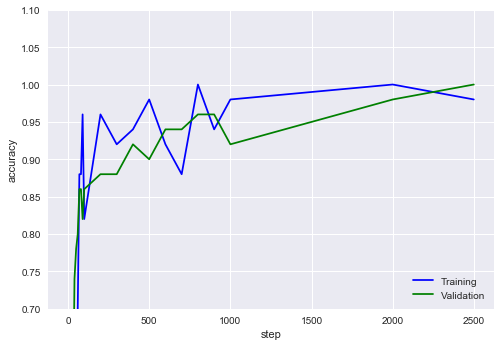

In [33]:
if(VALIDATION_SIZE):
    validation_accuracy = accuracy.eval(feed_dict={X: validation_images, 
                                                   Y: validation_labels, 
                                                   keep_prob: 1.0})
    print('validation_accuracy => %.4f'%validation_accuracy)
    plt.plot(x_range, train_accuracies,'-b', label='Training')
    plt.plot(x_range, validation_accuracies,'-g', label='Validation')
    plt.legend(loc='lower right', frameon=False)
    plt.ylim(ymax = 1.1, ymin = 0.7)
    plt.ylabel('accuracy')
    plt.xlabel('step')
    plt.show()

# Result

- accuracy = 98.5%
- estimated time = 25.9[s]

# Train에 대한 Test

In [34]:
test = test.astype(np.float)

- 0~255까지의 수를 0과 1 사이의 값으로 normalize

In [35]:
test = np.multiply(test, 1.0/255.0)
print(test.shape)

(28000, 784)


In [36]:
prediction_lables = np.zeros(test.shape[0])
print(prediction_lables)

[ 0.  0.  0. ...,  0.  0.  0.]


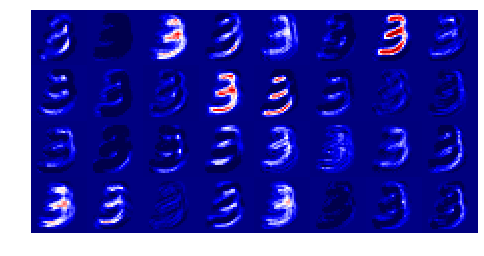

In [37]:
layer1_grid = layer_01.eval(feed_dict={X: test[7:7+1], keep_prob: 1.0})
plt.axis('off')
plt.imshow(layer1_grid[0], cmap=cm.seismic )
plt.show()

In [38]:
sess.close()